In [1]:
from SCFT_functions import *

import numpy as np
import matplotlib.pyplot as plt

Using cupy


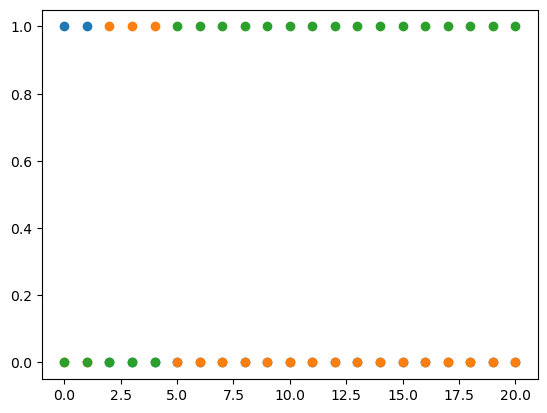

In [2]:
ns = 20

fa = 0.1
fb = 0.15
fc = 0.75

chain_interaction = np.zeros((3, ns+1))
chain_interaction[0, 0:int((ns+1)*fa)] += 1 # type A
chain_interaction[1, int((ns+1)*fa):int((ns+1)*fa+(ns+1)*fb)] += 1 # type B
chain_interaction[2, int((ns+1)*fa+(ns+1)*fb):] += 1 #type C

for i in range(3):
    plt.scatter(np.arange(ns+1), chain_interaction[i, :])

In [3]:
chi_bs = 30
chi_cs = 30
chi_polymer_s = np.array([0.5, chi_bs, chi_cs])

chi_N_polymer = 15
chi_matrix = chi_N_polymer * np.ones((chain_interaction.shape[0], chain_interaction.shape[0]))
np.fill_diagonal(chi_matrix, 0)

N = 20

nx = ny = 128
initial_qsr = np.ones((nx, ny))
L = 100 #dimension of the box

polymer = Scft(
    N = N,
    Lx=L, Ly=L,
    phibar=0.1, # volume fraction of polymer
    l_p=np.sqrt(N),
    n_seg=1, # contour length of polymer normalized from 0-1
    nx=nx, ny=ny,
    ns=ns,
    iterations=500,
    error_tol=1e-12,
    chain_interaction=chain_interaction,
    self_avoiding=0,
    initial_qsr=initial_qsr / np.mean(initial_qsr),
    mixing_rate=0.03,
    chi_polymer_block = chi_matrix,
    chi_polymer_s = chi_polymer_s,
    PB = 2,
    close_boundary=True,
)

In [4]:
wsr, qsr_initial, qsr_d_initial, diff = initialization(polymer, seed = 5)

In [5]:
wsr, phi, phi_blocks, qsr, qsr_d, diff = scft_loop(polymer, wsr, qsr_initial, qsr_d_initial, diff)

100%|██████████| 500/500 [00:18<00:00, 27.57it/s]


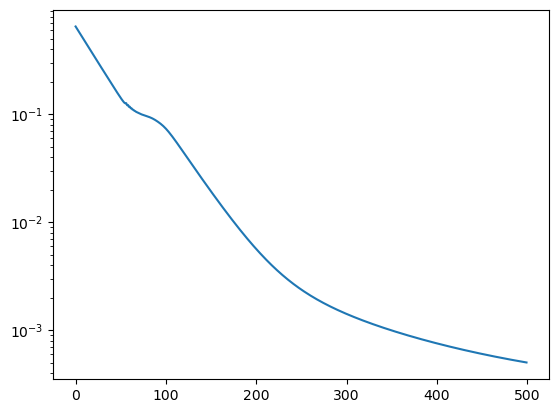

In [6]:
plt.plot(diff)
plt.yscale('log')

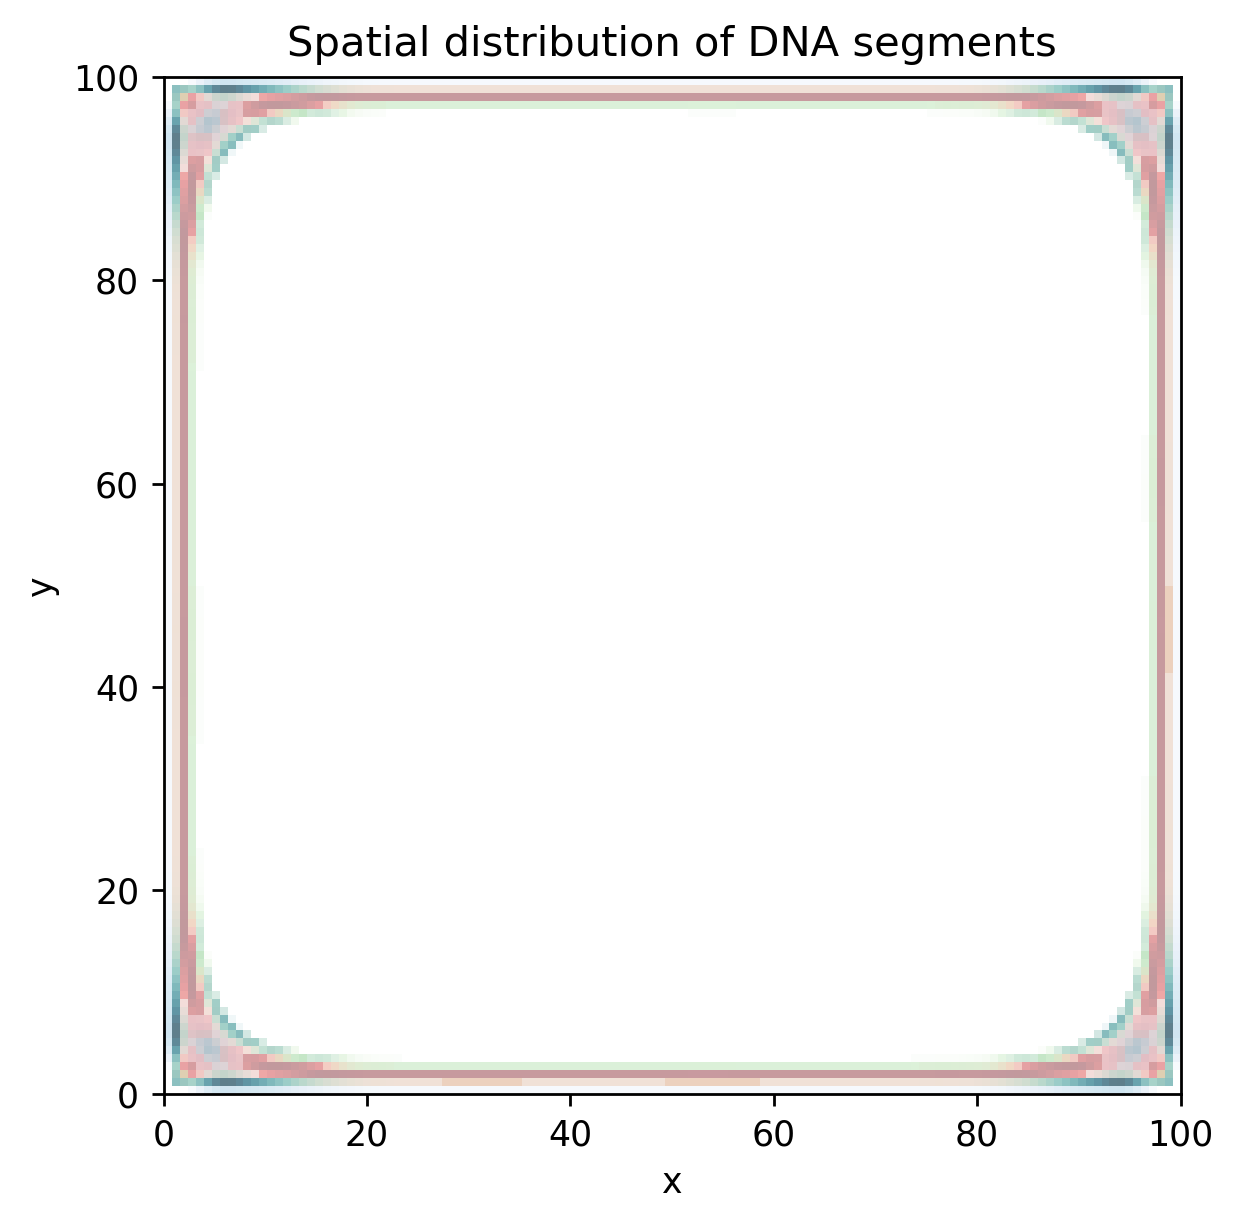

In [7]:
plot_phi_blocks_periodic(np.flip(to_numpy(phi_blocks), axis=0), extent=(0, polymer.Lx, 0, polymer.Ly), percentile=92, shift_x=0, shift_y=0)

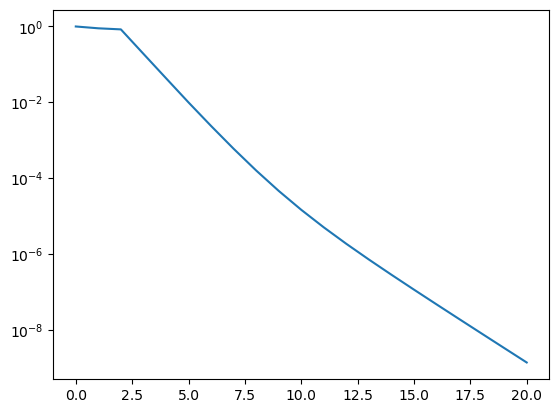

In [8]:
qsr_decay = np.mean(qsr, axis = (1,2))
plt.plot(to_numpy(qsr_decay))
plt.yscale('log')

In [ ]:
polymer.mixing_rate=0.1
polymer.iterations=1000
wsr, phi, phi_blocks, qsr, qsr_d, diff = scft_loop(polymer, wsr, qsr_initial, qsr_d_initial, diff)